In [25]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [2]:
digits = load_digits()

In [9]:
x = digits.data
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
y = digits.target
print(len(y))

1797


In [10]:
dff = pd.DataFrame(x,columns=digits.feature_names)
dff

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
dft = pd.DataFrame(y,columns=['target'])
dft

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [13]:
df = pd.concat([dff,dft],axis=1)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [17]:
X = df.drop('target',axis=1)
xtr,xte,ytr,yte = train_test_split(X,df['target'],test_size=0.2,random_state=42)

In [19]:
model = GaussianNB()

In [20]:
model.fit(xtr,ytr)

GaussianNB()

In [22]:
pred = model.predict(xte)
pred

array([6, 9, 3, 7, 2, 1, 5, 8, 5, 2, 1, 1, 7, 0, 4, 8, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 2, 5, 6, 0, 9, 0, 0, 1, 7, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 3, 5, 7, 7, 0, 4, 5, 5, 5, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 1, 3, 5, 2, 8, 0, 4, 7, 4, 3, 5, 3, 1, 8, 5, 7, 4, 2,
       7, 7, 7, 6, 1, 9, 8, 7, 8, 7, 2, 6, 9, 4, 5, 7, 8, 7, 5, 8, 5, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 8, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 2, 3, 3, 7, 7, 2, 3, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 8, 1, 3,
       7, 7, 2, 8, 3, 9, 8, 0, 3, 8, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 8, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 8, 8, 6, 0, 4, 5,
       8, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 4, 1, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 8, 7, 8, 6, 0, 8, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 7, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 2,

In [26]:
accuracy_score(yte,pred)

0.8472222222222222

In [29]:
precision_score(yte,pred,average='macro')

0.8649844547206135

In [31]:
recall_score(yte,pred,average='macro')

0.8476479221745045

In [32]:
print(confusion_matrix(yte,pred))

[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]


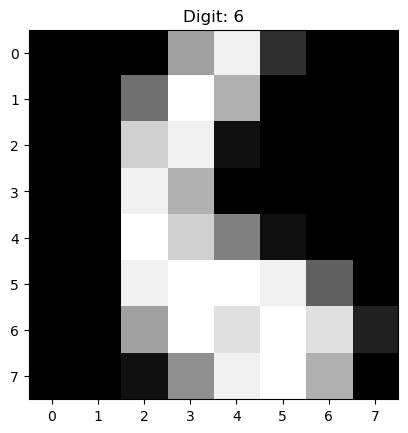

In [39]:
plt.imshow(digits.images[82], cmap='gray')
plt.title('Digit: {}'.format(digits.target[82]))
plt.show()